# Stage 0: Análisis exploratorio

In [5]:
import pandas as pd
import regex
import requests
import unidecode
import os, glob
from pathlib import Path  
import cv2
import plotly.express as px
import matplotlib.pyplot as plt 
from tqdm import tqdm
import shutil, sys
import urllib.request
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk import FreqDist
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adelaidazuluaga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adelaidazuluaga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil, sys
import urllib.request 
import PIL
import tensorflow as tf
import keras
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD

2022-09-18 23:10:41.670700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
import seaborn as sns

## Análisis exploratorio 


TO-DO: 
* Graficar el tamaño de las imágenes por clase
* Número de únicos nombres por clase por categoria
* Word length por cada numbre de producto

In [21]:
cwd = os.getcwd()

filepath = Path(cwd+'/dataset_train.csv')  
df_train = pd.read_csv(filepath,sep=',')
df_train['subset'] = 'train'

filepath = Path(cwd+'/dataset_test.csv') 
df_test = pd.read_csv(filepath,sep=',')
df_test['subset'] ='test'

filepath = Path(cwd+'/dataset_val.csv') 
df_val = pd.read_csv(filepath,sep=',')
df_val['subset'] = 'val'

In [19]:
df_train['categoria'].value_counts()

deportes y fitness               1750
juegos y juguetes                1250
ropa y accesorios                1100
accesorios para vehiculos        1098
servicios                         900
computacion                       900
bebes                             750
electronica  audio y video        749
belleza y cuidado personal        650
autos  motos y otros              650
industrias y oficinas             650
hogar  muebles y jardin           600
instrumentos musicales            599
camaras y accesorios              550
construccion                      550
souvenirs  cotillon y fiestas     550
otras categorias                  503
animales y mascotas               500
antiguedades y colecciones        450
joyas y relojes                   450
celulares y telefonos             450
herramientas                      450
agro                              400
electrodomesticos y aires ac      400
salud y equipamiento medico       400
consolas y videojuegos            350
libros  revi

In [22]:
df_test['categoria'].value_counts()

electronica  audio y video       150
electrodomesticos y aires ac     150
souvenirs  cotillon y fiestas    150
servicios                        150
salud y equipamiento medico      150
ropa y accesorios                150
musica  peliculas y series       150
libros  revistas y comics        150
juegos y juguetes                150
joyas y relojes                  150
inmuebles                        150
industrias y oficinas            150
herramientas                     150
entradas para eventos            150
agro                             150
otras categorias                 150
deportes y fitness               150
construccion                     150
computacion                      150
celulares y telefonos            150
camaras y accesorios             150
belleza y cuidado personal       150
bebes                            150
autos  motos y otros             150
arte  libreria y merceria        150
antiguedades y colecciones       150
animales y mascotas              150
a

In [23]:
df_test['categoria'].value_counts()

electronica  audio y video       150
electrodomesticos y aires ac     150
souvenirs  cotillon y fiestas    150
servicios                        150
salud y equipamiento medico      150
ropa y accesorios                150
musica  peliculas y series       150
libros  revistas y comics        150
juegos y juguetes                150
joyas y relojes                  150
inmuebles                        150
industrias y oficinas            150
herramientas                     150
entradas para eventos            150
agro                             150
otras categorias                 150
deportes y fitness               150
construccion                     150
computacion                      150
celulares y telefonos            150
camaras y accesorios             150
belleza y cuidado personal       150
bebes                            150
autos  motos y otros             150
arte  libreria y merceria        150
antiguedades y colecciones       150
animales y mascotas              150
a

In [23]:
print(df_train.shape,df_test.shape,df_val.shape)

(22335, 6) (4787, 6) (4788, 6)


# Distribución imágenes por clase

In [25]:
df_total = pd.concat([df_train,df_test,df_val])

In [36]:
df_count_imgs = pd.DataFrame(df_total.groupby(['categoria','subset'])['imagen'].count()).reset_index()

In [35]:
fig = px.histogram(df_count_imgs, x="categoria", y="imagen",
             color='subset', barmode='group',title='Número de imágenes por clase')
fig.show()

In [78]:
def display_multiple_img(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    images = [cv2.imread(file) for file in glob.glob(images_paths)]
    for ind,image in enumerate(images):
        image_out = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image_out)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

### Deportes y fitness

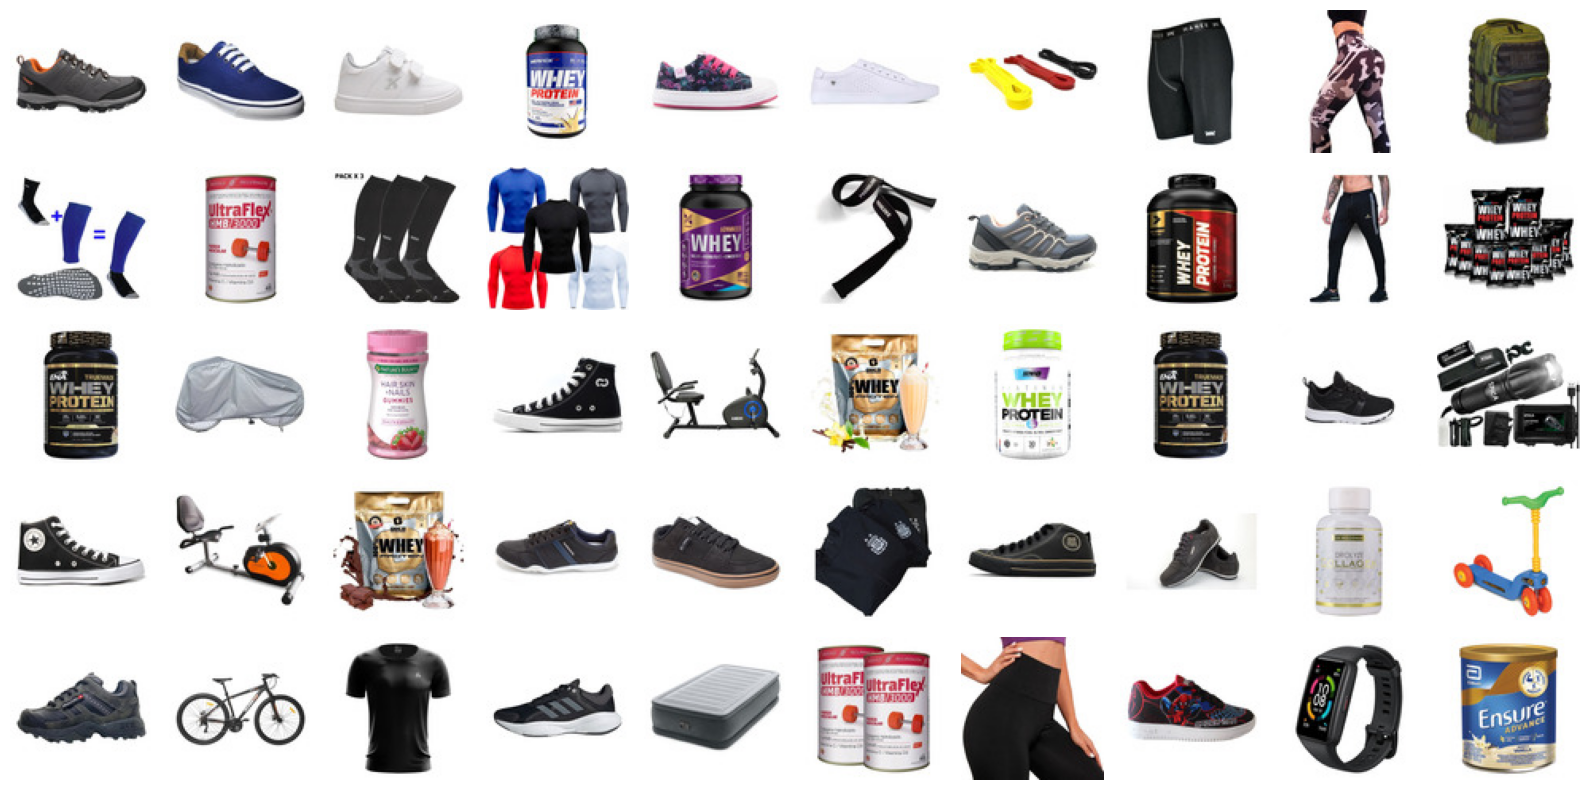

In [38]:
cwd = os.getcwd()
display_multiple_img(cwd+'/images_train/deportes y fitness/*.jpg',5,10)

### Ropa y accesorios

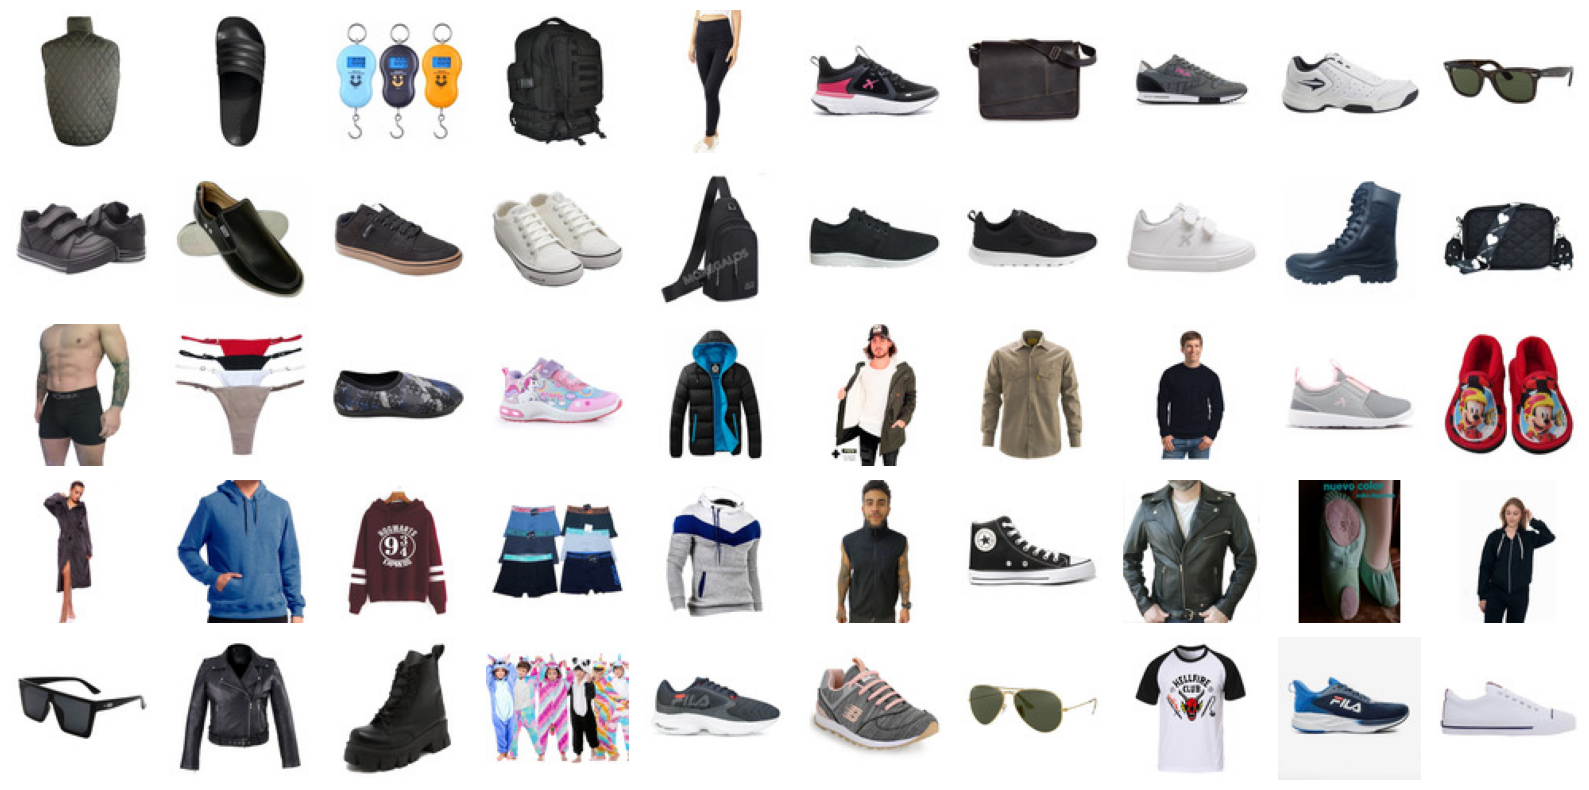

In [44]:
cwd = os.getcwd()
display_multiple_img(cwd+'/images_train/ropa y accesorios/*.jpg',5,10)

### Servicios

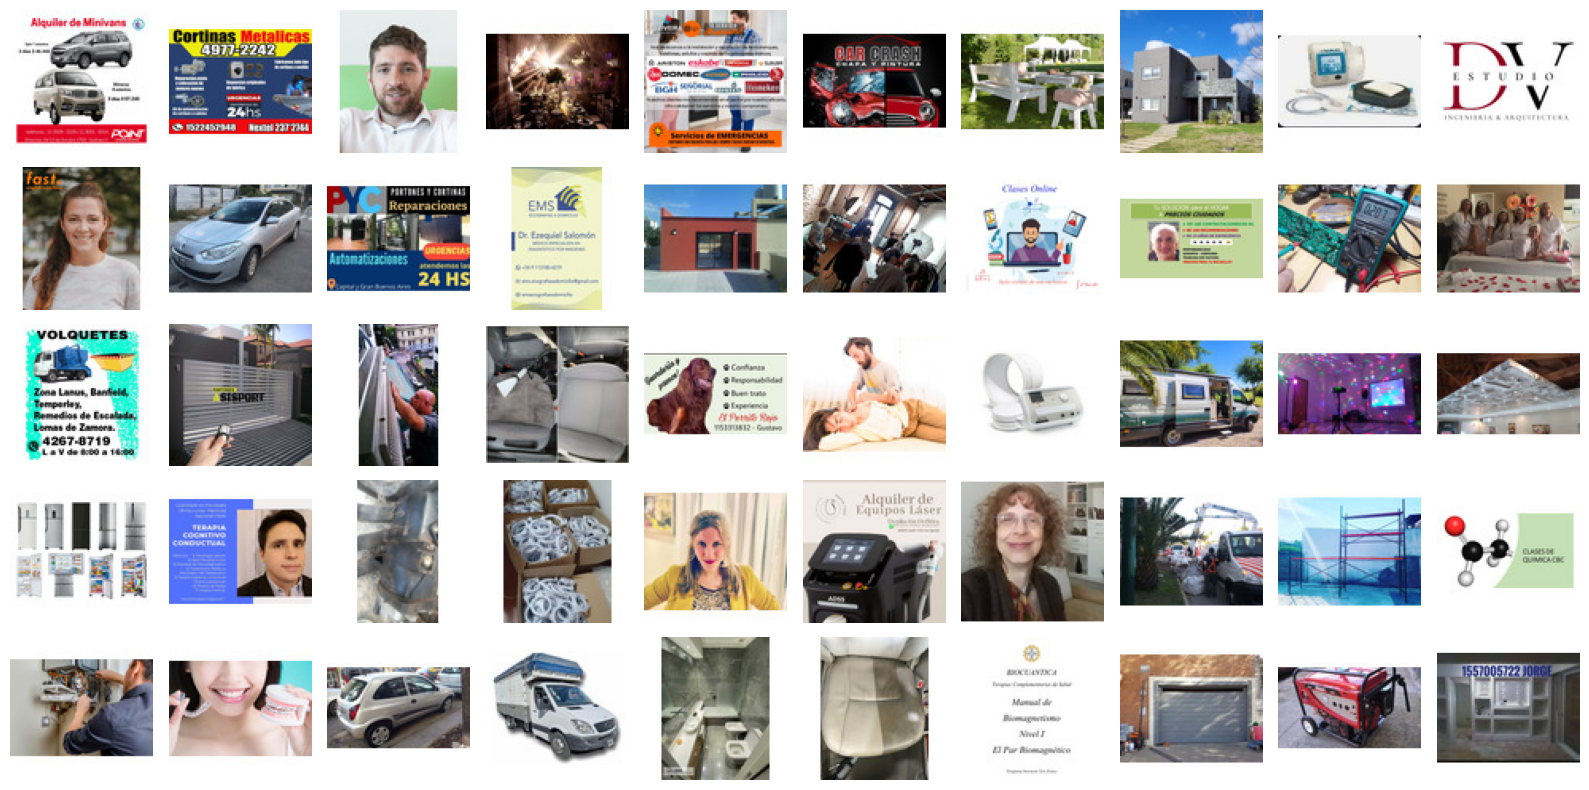

In [45]:
cwd = os.getcwd()
display_multiple_img(cwd+'/images_train/servicios/*.jpg',5,10)

# Entender cada categoría

In [46]:
def word_cloud_cat(dictionary_input):
    for cat in dictionary_input:
        text = " ".join(cat for cat in dictionary_input[cat]['nombre_preproc'])
        word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(str(cat))
        plt.show()

In [47]:
def remove_stopwords(sentence):
    stop_words_full = stopwords.words('spanish')
    stop_words_full.extend(['NUMB'])
    return [ token for token in nltk.word_tokenize(sentence) if token not in stop_words_full ]

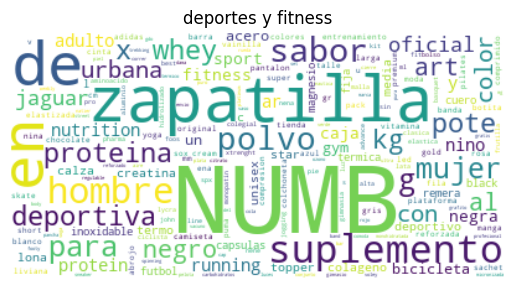

In [52]:
text = " ".join(cat for cat in df_total[df_total['categoria']=='deportes y fitness']['nombre_preproc'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title(str('deportes y fitness'))
plt.show()

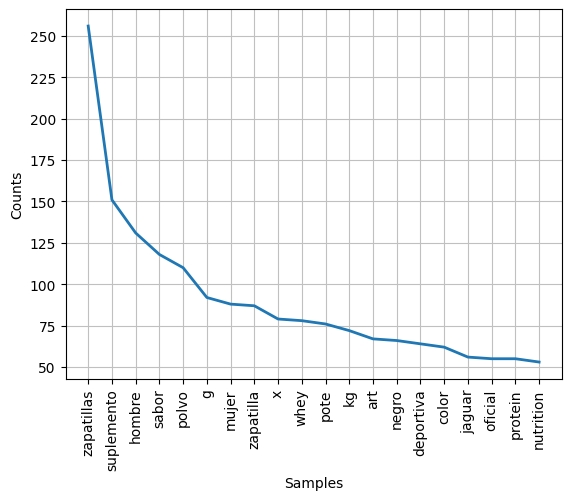

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
flat_list = [ xs for i in df_total[df_total['categoria']=='deportes y fitness']['nombre_preproc'] for xs in remove_stopwords(i)]
frequency_dist = FreqDist(flat_list)
frequency_dist.most_common(20)
frequency_dist.plot(20, cumulative=False)

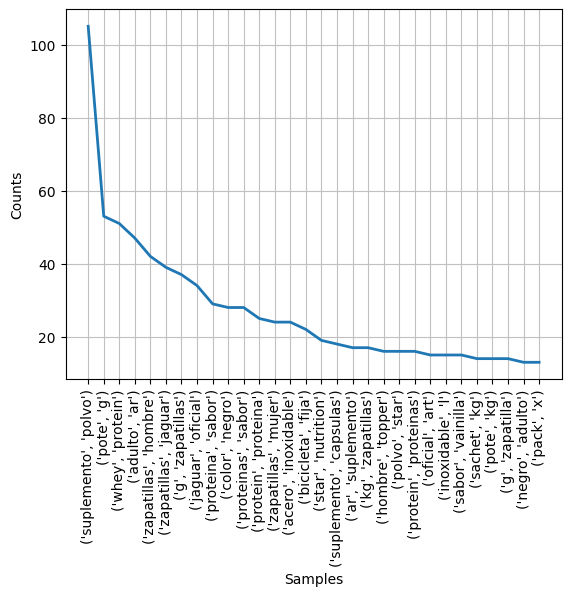

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
## Bigrams
flat_list = [ xs for i in df_total[df_total['categoria']=='deportes y fitness']['nombre_preproc'] for xs in remove_stopwords(i)]
text = " ".join(cat for cat in flat_list)
tokens = nltk.word_tokenize(text)
bgs = nltk.bigrams(tokens)
fdist = nltk.FreqDist(bgs)
fdist.plot(30)

Los top n-gramas muestran las sub-categorías más relevantes en la categoría general

In [ ]:
# TO-DO: 
# Aumentar el dataset con: 
    #precio por producto (DONE)
    #subcategoria a la que pertenece (DONE)
# Explorar histogramas de precios por categoria y por subcategoria 
    #Esto con el fin de identificar por qué en la clasificación de textos deporte y fitness se equivoca
    #clasificando en ropa y accesorios/salud y equipamiento
    #Al averiguar si existe una diferencia notable entre precios, se agrega el valor del precio por producto en la clasificación de productos 
    

# Generar y estudiar sub-categorías

In [8]:
cwd = os.getcwd()

filepath = Path(cwd+'/dataset_train_2.csv')  
df_train = pd.read_csv(filepath,sep=',')
df_train['subset'] = 'train'

In [9]:
df_sub_cats = pd.DataFrame(df_train.groupby('categoria')['sub_categoria'].nunique()).reset_index().sort_values(by='sub_categoria',ascending=False)

### Número de registros por clase

In [10]:
fig = px.histogram(df_sub_cats, x="categoria", y="sub_categoria",
             color='categoria', barmode='group',title='Número de subcategorias por clase')
fig.show()

In [ ]:
# to have a balanced dataset: download the same number of registers per subclass, not per class

In [16]:
df_train.groupby('sub_categoria').count()

nombre  categoria  num_categ  marca  precio  \
sub_categoria                                                                 
aberturas                           50         50         50     50      50   
abrigos                             50         50         50     50      50   
acc  para motos y cuatriciclos      50         50         50     50      50   
accesorios de auto y camioneta      50         50         50     50      50   
accesorios de construccion          50         50         50     50      50   
...                                ...        ...        ...    ...     ...   
video                               50         50         50     50      50   
videojuegos                         50         50         50     50      50   
voley                               50         50         50     50      50   
wakeboard y esqui acuatico          50         50         50     50      50   
zapatillas                          50         50         50     50      50   

                                imagen  nombre_preproc  subset  
sub_categoria                                                   
aberturas                           50              50      50  
abrigos                             50              50      50  
acc  para motos y cuatriciclos      50              50      50  
accesorios de auto y camioneta      50              50      50  
accesorios de construccion          50              50      50  
...                                ...             ...     ...  
video                               50              50      50  
videojuegos                         50              50      50  
voley                               50              50      50  
wakeboard y esqui acuatico          50              50      50  
zapatillas                          50              50      50  

[348 rows x 8 columns]

### Distribución de precios por categoría 

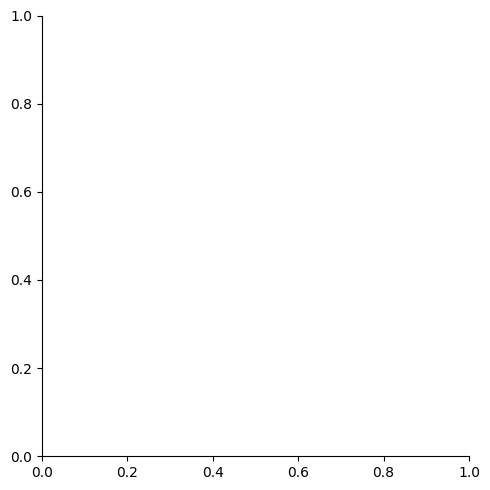

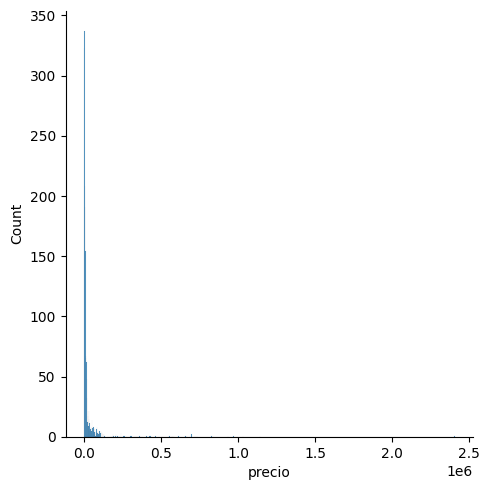

In [91]:
sns.displot(df_train[df_train['categoria']=='deportes y fitness'], x="precio")

# Extract image feature vector

In [ ]:
# Feature vector: 

In [30]:
import os
from PIL import Image
import numpy as np


In [34]:
def extract_features(directory):
    model=tf.keras.applications.xception.Xception(include_top=False, pooling='avg')
    features = {}
    for (root,dirs,files) in tqdm(os.walk(directory)):
        for img in files: 
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            image = image/127.5
            image = image - 1.0
            feature = model.predict(image)
            features[img] = feature
    return features

In [35]:
cwd

'/Users/adelaidazuluaga/Documents/AdelaidaZuluaga'

In [36]:
out_ = extract_features('/Users/adelaidazuluaga/Documents/AdelaidaZuluaga/images_train/belleza y cuidado personal')

0it [00:00, ?it/s]

1/1 [==============================] - 0s 433ms/step


1/1 [==============================] - 0s 409ms/step


1/1 [==============================] - 0s 462ms/step


1it [08:28, 508.97s/it]


In [39]:
out_['belleza y cuidado personal633.jpg'].shape

(1, 2048)